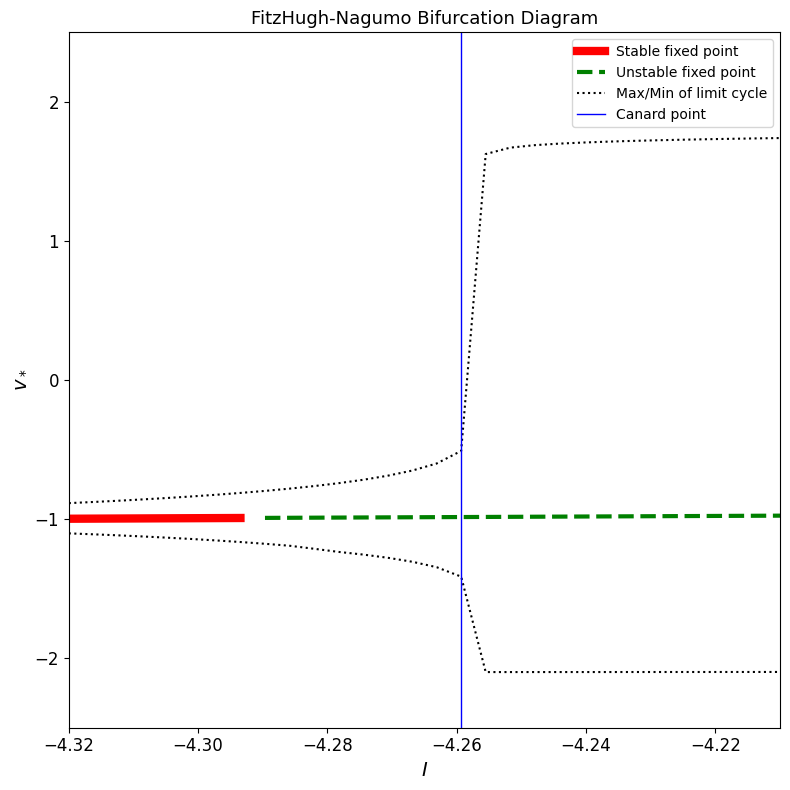

Canard point: -4.259310344827586


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from numpy.linalg import eigvals
from scipy.integrate import solve_ivp


#Parameters
a = 5
tau_n = 60
I_values = np.linspace(-4.32, -4.21, 30)

def fhn_nullcline(v, I, a):
    return v - (v**3) / 3 + I - a * v
def fh_n(t, y, a, tau_n, I):
    v, n = y
    dvdt = v - (v**3) / 3 - n + I
    dndt = (a * v - n) / tau_n
    return [dvdt, dndt]
def jacobian(v_star, n_star, a, tau_n):
    df1dv = 1 - v_star**2
    df1dn = -1
    df2dv = a / tau_n
    df2dn = -1 / tau_n
    return np.array([[df1dv, df1dn],
                     [df2dv, df2dn]])

stable_pts = []
unstable_pts = []
I_stable = []
I_unstable = []

v_max_list = []
v_min_list = []
I_cycle_list = []

canard_point = 0

t_span = (0, 200)
y0 = [-0.5, -3.0]

# i = 0
for I in I_values:
    sol = solve_ivp(fh_n, t_span, y0, args=(a, tau_n, I),
                    max_step=0.1, rtol=1e-6, atol=1e-8)

    t = sol.t
    v = sol.y[0]

    #use last 50% of data
    cutoff = int(0.5 * len(v))
    v_tail = v[cutoff:]

    v_max = np.max(v_tail)
    v_min = np.min(v_tail)

    v_max_list.append(v_max)
    v_min_list.append(v_min)
    I_cycle_list.append(I)
    # if canard_point == 0 and i >= 1 and abs(v_max_list[i] - v_min_list[i]) - abs(v_max_list[i-1] - v_min_list[i-1]) > 0.5:
    #     canard_point = I

    guesses = np.linspace(-3, 3, 10)
    v_roots = []

    for guess in guesses:
        v_star, = fsolve(fhn_nullcline, guess, args=(I, a))
        if not any(np.isclose(v_star, root, atol=1e-4) for root in v_roots):
            v_roots.append(v_star)

    for v_star in v_roots:
        n_star = a * v_star
        J = jacobian(v_star, n_star, a, tau_n)
        eigenvalues = eigvals(J)
        if np.all(np.real(eigenvalues) < 0):
            stable_pts.append(v_star)
            I_stable.append(I)
        else:
            unstable_pts.append(v_star)
            I_unstable.append(I)
    # i += 1
    
for i in range(len(v_max_list) - 2):
    if canard_point == 0 and abs(v_max_list[i+1] - v_min_list[i+1]) - abs(v_max_list[i-1] - v_min_list[i-1]) > 0.5:
        canard_point = I_cycle_list[i]

# Plotting
plt.figure(figsize=(8, 8))

plt.plot(I_stable, stable_pts, 'r-', linewidth=6, label='Stable fixed point')
plt.plot(I_unstable, unstable_pts, 'g--', linewidth=3, label='Unstable fixed point')

plt.plot(I_cycle_list, v_max_list, 'k:', linewidth=1.5, label='Max/Min of limit cycle')
plt.plot(I_cycle_list, v_min_list, 'k:', linewidth=1.5)

plt.axvline(x=canard_point, color='b', linewidth=1, label='Canard point')
plt.xlabel('$I$', fontsize=14)
plt.ylabel('$v_*$', fontsize=14)
plt.xlim([I_values[0], I_values[-1]])
plt.ylim([-2.5, 2.5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('FitzHugh-Nagumo Bifurcation Diagram', fontsize=13)
plt.grid(False)
plt.legend(loc='best', fontsize=10)
plt.tight_layout()
plt.show()
print('Canard point:', canard_point)


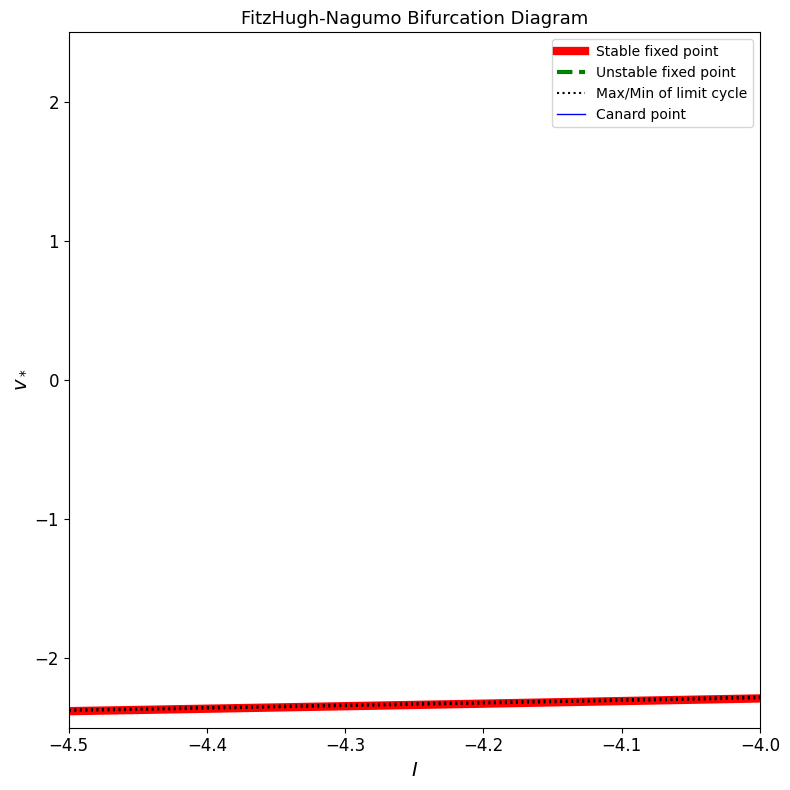

Canard point: 0


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from numpy.linalg import eigvals
from scipy.integrate import solve_ivp

####TESTING OTHER PARAMETERS (IN PROGRESS)####
#Parameters
a = 1
tau_n = 50
I_values = np.linspace(-4.5, -4.00, 50)

def fhn_nullcline(v, I, a):
    return v - (v**3) / 3 + I - a * v
def fh_n(t, y, a, tau_n, I):
    v, n = y
    dvdt = v - (v**3) / 3 - n + I
    dndt = (a * v - n) / tau_n
    return [dvdt, dndt]
def jacobian(v_star, n_star, a, tau_n):
    df1dv = 1 - v_star**2
    df1dn = -1
    df2dv = a / tau_n
    df2dn = -1 / tau_n
    return np.array([[df1dv, df1dn],
                     [df2dv, df2dn]])

stable_pts = []
unstable_pts = []
I_stable = []
I_unstable = []

v_max_list = []
v_min_list = []
I_cycle_list = []

canard_point = 0

t_span = (0, 200)
y0 = [-0.5, -3.0]

# i = 0
for I in I_values:
    sol = solve_ivp(fh_n, t_span, y0, args=(a, tau_n, I),
                    max_step=0.1, rtol=1e-6, atol=1e-8)

    t = sol.t
    v = sol.y[0]

    #use last 50% of data
    cutoff = int(0.5 * len(v))
    v_tail = v[cutoff:]

    v_max = np.max(v_tail)
    v_min = np.min(v_tail)

    v_max_list.append(v_max)
    v_min_list.append(v_min)
    I_cycle_list.append(I)
    # if canard_point == 0 and i >= 1 and abs(v_max_list[i] - v_min_list[i]) - abs(v_max_list[i-1] - v_min_list[i-1]) > 0.5:
    #     canard_point = I

    guesses = np.linspace(-3, 3, 10)
    v_roots = []

    for guess in guesses:
        v_star, = fsolve(fhn_nullcline, guess, args=(I, a))
        if not any(np.isclose(v_star, root, atol=1e-4) for root in v_roots):
            v_roots.append(v_star)

    for v_star in v_roots:
        n_star = a * v_star
        J = jacobian(v_star, n_star, a, tau_n)
        eigenvalues = eigvals(J)
        if np.all(np.real(eigenvalues) < 0):
            stable_pts.append(v_star)
            I_stable.append(I)
        else:
            unstable_pts.append(v_star)
            I_unstable.append(I)
    # i += 1
    
for i in range(len(v_max_list) - 2):
    if canard_point == 0 and abs(v_max_list[i+1] - v_min_list[i+1]) - abs(v_max_list[i-1] - v_min_list[i-1]) > 0.5:
        canard_point = I_cycle_list[i]

# Plotting
plt.figure(figsize=(8, 8))

plt.plot(I_stable, stable_pts, 'r-', linewidth=6, label='Stable fixed point')
plt.plot(I_unstable, unstable_pts, 'g--', linewidth=3, label='Unstable fixed point')

plt.plot(I_cycle_list, v_max_list, 'k:', linewidth=1.5, label='Max/Min of limit cycle')
plt.plot(I_cycle_list, v_min_list, 'k:', linewidth=1.5)

plt.axvline(x=canard_point, color='b', linewidth=1, label='Canard point')
plt.xlabel('$I$', fontsize=14)
plt.ylabel('$v_*$', fontsize=14)
plt.xlim([I_values[0], I_values[-1]])
plt.ylim([-2.5, 2.5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('FitzHugh-Nagumo Bifurcation Diagram', fontsize=13)
plt.grid(False)
plt.legend(loc='best', fontsize=10)
plt.tight_layout()
plt.show()
print('Canard point:', canard_point)
